In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

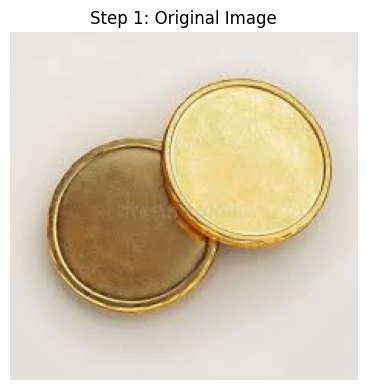

In [3]:
original_image = cv2.imread('images.jpeg')
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 4))
plt.imshow(original_image_rgb)
plt.title('Step 1: Original Image')
plt.axis('off')
plt.tight_layout()
plt.show()

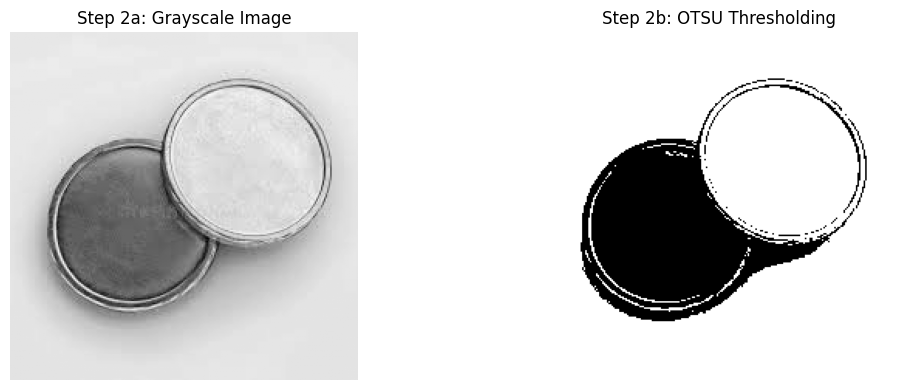

In [6]:
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

ret, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Step 2a: Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Step 2b: OTSU Thresholding')
plt.axis('off')
plt.tight_layout()
plt.show()

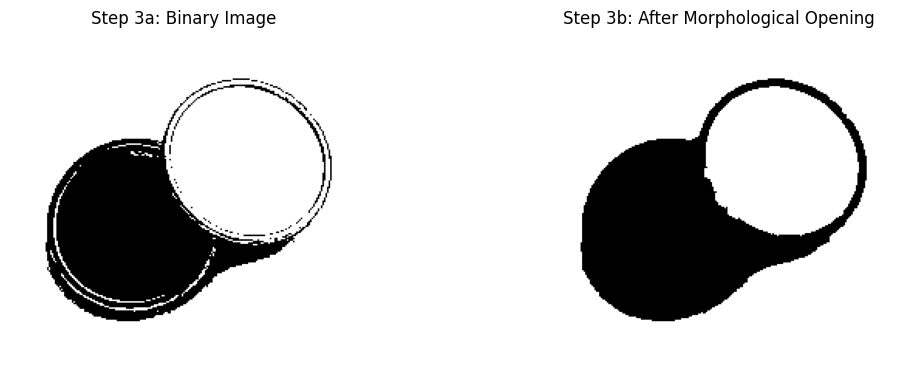

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Step 3a: Binary Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(opened_image, cmap='gray')
plt.title('Step 3b: After Morphological Opening')
plt.axis('off')
plt.tight_layout()
plt.show()

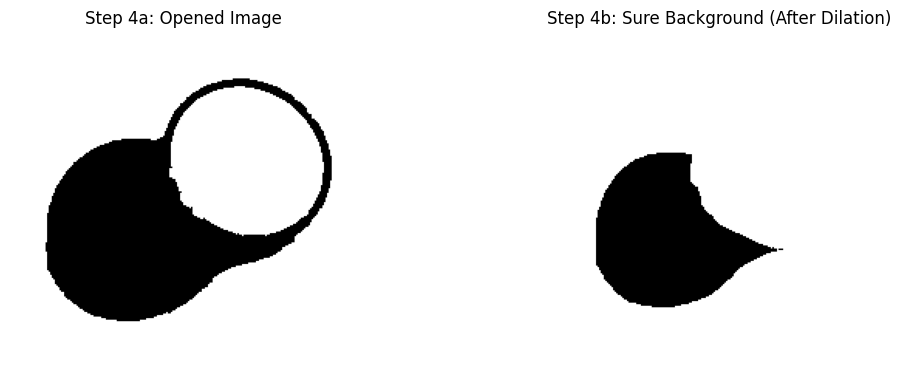

In [8]:
kernel_dilate = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
sure_background = cv2.dilate(opened_image, kernel_dilate, iterations=3)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(opened_image, cmap='gray')
plt.title('Step 4a: Opened Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sure_background, cmap='gray')
plt.title('Step 4b: Sure Background (After Dilation)')
plt.axis('off')
plt.tight_layout()
plt.show()

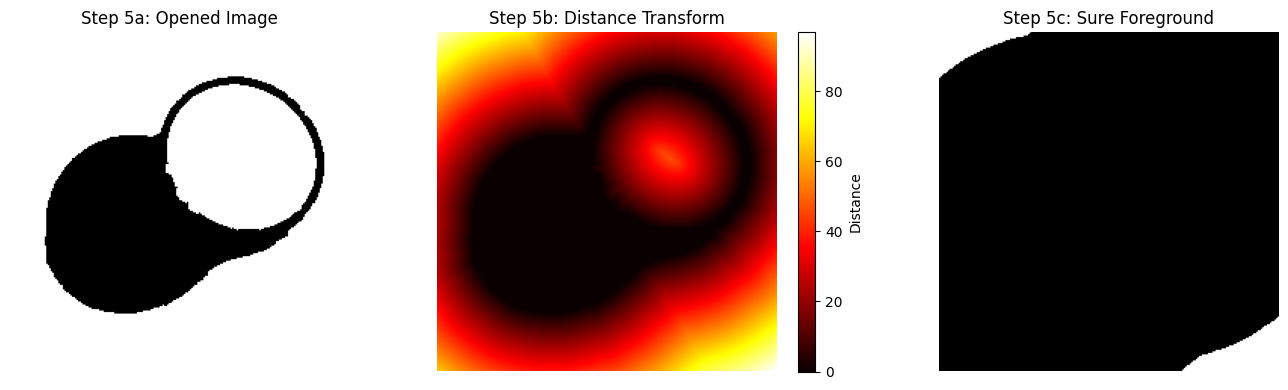

In [9]:
distance_transform = cv2.distanceTransform(opened_image, cv2.DIST_L2, cv2.DIST_MASK_PRECISE)
ret, sure_foreground = cv2.threshold(distance_transform, 0.7 * distance_transform.max(), 255, 0)
sure_foreground = np.uint8(sure_foreground)

plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.imshow(opened_image, cmap='gray')
plt.title('Step 5a: Opened Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(distance_transform, cmap='hot')
plt.title('Step 5b: Distance Transform')
plt.axis('off')
plt.colorbar(label='Distance')

plt.subplot(1, 3, 3)
plt.imshow(sure_foreground, cmap='gray')
plt.title('Step 5c: Sure Foreground')
plt.axis('off')
plt.tight_layout()
plt.show()

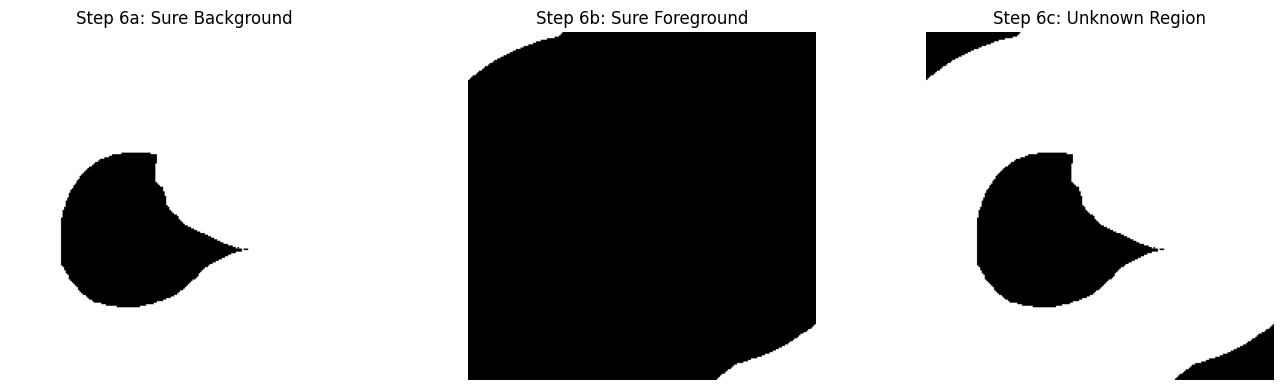

In [10]:
unknown = cv2.subtract(sure_background, sure_foreground)

plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.imshow(sure_background, cmap='gray')
plt.title('Step 6a: Sure Background')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sure_foreground, cmap='gray')
plt.title('Step 6b: Sure Foreground')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(unknown, cmap='gray')
plt.title('Step 6c: Unknown Region')
plt.axis('off')
plt.tight_layout()
plt.show()

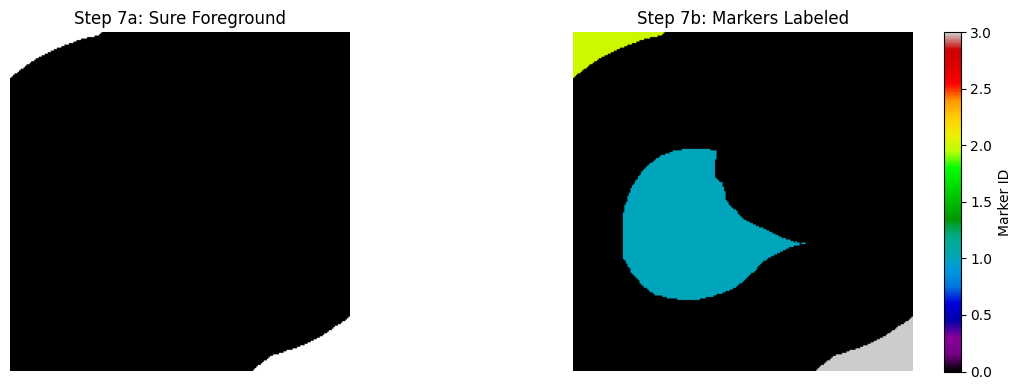

In [11]:
ret, markers = cv2.connectedComponents(sure_foreground)
markers = markers + 1
markers[unknown == 255] = 0

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(sure_foreground, cmap='gray')
plt.title('Step 7a: Sure Foreground')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(markers, cmap='nipy_spectral')
plt.title('Step 7b: Markers Labeled')
plt.axis('off')
plt.colorbar(label='Marker ID')
plt.tight_layout()
plt.show()

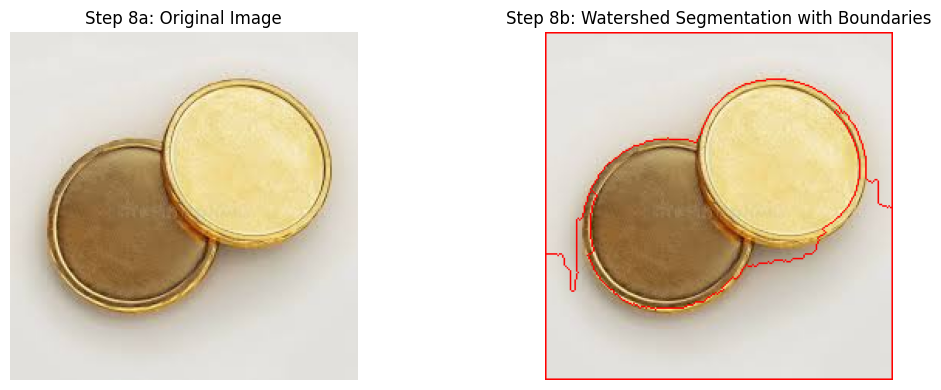

In [12]:
markers_watershed = cv2.watershed(original_image, markers)
original_image_marked = original_image.copy()
original_image_marked[markers_watershed == -1] = [0, 0, 255]
original_image_marked_rgb = cv2.cvtColor(original_image_marked, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title('Step 8a: Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(original_image_marked_rgb)
plt.title('Step 8b: Watershed Segmentation with Boundaries')
plt.axis('off')
plt.tight_layout()
plt.show()

## Results Interpretation

- Successfully segments and separates touching coins/objects into individual distinct regions
- Watershed algorithm effectively identifies object boundaries even when objects overlap
- OTSU thresholding provides optimal automatic separation between foreground and background
- Distance transform accurately locates object centers for seed marker placement
- Morphological operations effectively remove noise while preserving object structure
- Red boundary lines clearly delineate each segmented object in the final result
- Algorithm handles touching objects without merging them into single regions
- Results show clear isolation of each coin with well-defined boundaries